In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier

# Read the dataset
dataset = pd.read_excel('Fire_cl.xlsx')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Perform one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize the feature variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define classifiers
c1 = RandomForestClassifier(n_estimators=10, random_state=123)
c2 = ExtraTreesClassifier(n_estimators=10, random_state=123)
c3 = AdaBoostClassifier(n_estimators=10, random_state=123)
lr = LogisticRegression(solver='lbfgs')
c4 = GaussianNB()
c5 = DecisionTreeClassifier()
c6 = KNeighborsClassifier(n_neighbors=2)
c7 = SVC(C=10000.0, kernel='rbf')
c8 = RidgeClassifier(alpha=0.1)
c9 = MLPClassifier()
c10 = PassiveAggressiveClassifier()

# Create a stacking classifier
model = StackingClassifier(estimators=[('c1', c1), ('c3', c3), ('c4', c4)], final_estimator=lr)

# Define cross-validation parameters
kfold = StratifiedKFold(n_splits=10)

# List of classifiers
algorithms= [c1, c2, c3, c4, c6, c7, c8, c9, c10, lr, model]

cv_res =[]
# Perform cross-validation
for algo in algorithms:
    cv_res.append(cross_val_score(algo, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=4))

cv_mean, cv_std = [], []

for result in cv_res:
    cv_mean.append(result.mean())
    cv_std.append(result.std())

algorithm =["RF", "ET", "AdaBoost", "GNB", "KNN", "SVM","Ridge","MLP", "PA", "LR", "RAGN-L"]

cv_result = pd.DataFrame({"Algorithms":algorithm, "Mean accuracy":cv_mean, "Standard Deviation":cv_std})

# Sorting
cv_result.sort_values(by='Mean accuracy',ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

,Algorithms,Mean accuracy,Standard Deviation
10,RAGN-L,0.866667,0.125610
0,RF,0.796667,0.045826
5,SVM,0.773333,0.193103
1,ET,0.740000,0.147422
8,PA,0.703333,0.116857
4,KNN,0.680000,0.216641
6,Ridge,0.680000,0.131825
9,LR,0.666667,0.201108
7,MLP,0.646667,0.210396
2,AdaBoost,0.646667,0.060000


<Axes: xlabel='Mean accuracy', ylabel='Algorithms'>

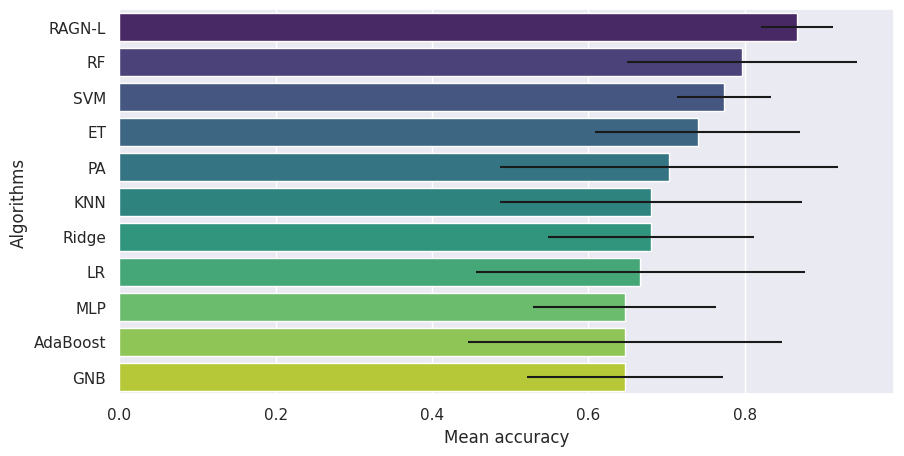

In [2]:
#visualization
cv_result = cv_result.sort_values(by='Mean accuracy', ascending=False)
import seaborn as sns; sns.set()
plt.figure(figsize=(10,5))
sns.barplot(x='Mean accuracy', y='Algorithms', data=cv_result, palette='viridis', orient='h', xerr=cv_std)